In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


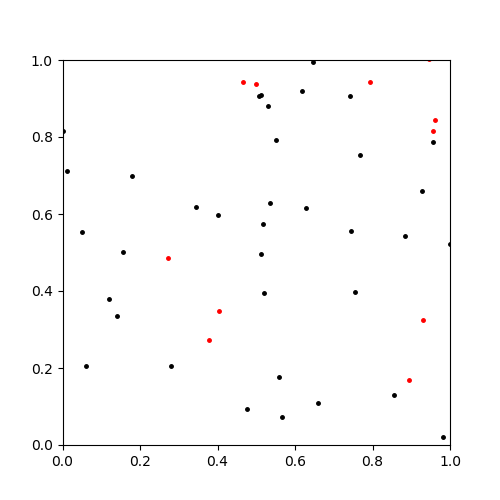

<IPython.core.display.Javascript object>


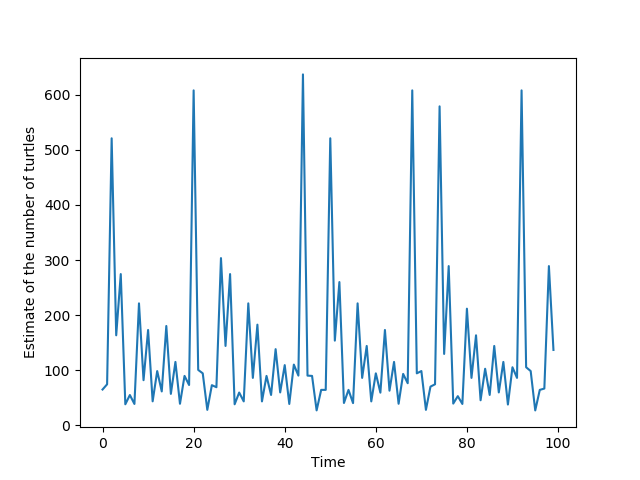

Text(0, 0.5, 'Estimate of the number of turtles')

In [9]:
%matplotlib notebook

nanimals = 100
nsteps = 100
trapsize = 0.5

vmin= 0.3
vmax=0.6

x = np.random.uniform(size=nanimals)
y = np.random.uniform(size=nanimals)
vx = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)
vy = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)

color = np.where(np.logical_and(x<trapsize , y<trapsize), 1, 0)
marked = np.sum(color)

estimation = np.zeros(nsteps)

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(nsteps):
    x += vx
    y += vy
    
    vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
    vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
    
    totalrecap = np.sum(np.logical_and(x<trapsize, y<trapsize))
    markedrecap = np.sum(np.logical_and(x<trapsize, y<trapsize)*color)
    estimation[t] = (marked+1)/(markedrecap+1)*(totalrecap)-1
    
    ax.clear()
    plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
    plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw()

plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')

# 1) Modify our "Mark and recapture" model to make it produce the average expectation for the number of animals. 

Do it by wrapping it in an outer loop, to run the model several times; remember the output (the estimation history) from each run of the model, average all estimation-histories across the runs. As you troubleshoot this, make the nsteps small, and auto-run the model only 2-3 times, just to make sure that it works. Once you are sure that your program works, you can again change the nsteps to several hundreds, and also make it rerun the model enough times to get a smooth-ish curve.

<IPython.core.display.Javascript object>


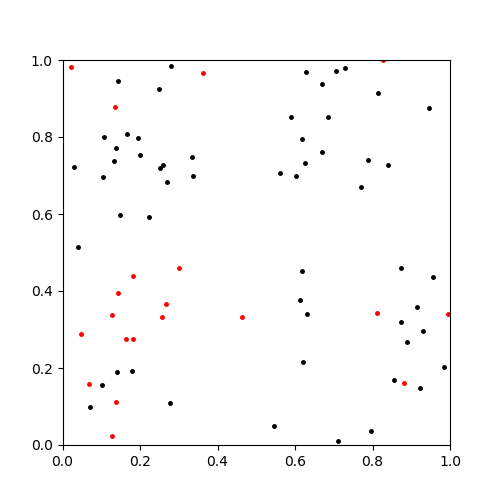

<IPython.core.display.Javascript object>


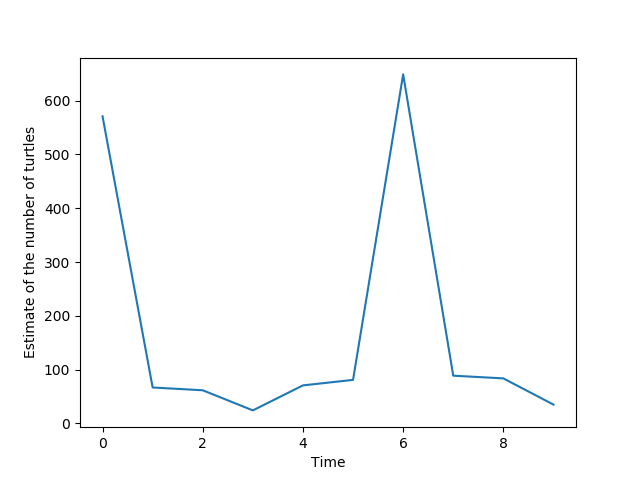

In [14]:
%matplotlib notebook

nanimals = 100
nsteps = 10
trapsize = 0.5

vmin= 0.3
vmax=0.6

x = np.random.uniform(size=nanimals)
y = np.random.uniform(size=nanimals)
vx = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)
vy = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)

color = np.where(np.logical_and(x<trapsize , y<trapsize), 1, 0)
marked = np.sum(color)

estimation = np.zeros(nsteps)

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for i in np.arange(0.3,0.6,0.1): # For the range I used the same numbers at vmin and vmax
    for t in range(nsteps):
        x += vx
        y += vy
    
        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
    
        totalrecap = np.sum(np.logical_and(x<trapsize, y<trapsize))
        markedrecap = np.sum(np.logical_and(x<trapsize, y<trapsize)*color)
        estimation[t] = (marked+1)/(markedrecap+1)*(totalrecap)-1
    
        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw()

plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles');